# Disney+ Movies and TV Shows

## Latar Belakang

*Disney*+ adalah salah satu platform streaming media dan video paling populer. Mereka memiliki hampir 1300 film atau acara tv yang tersedia di platform mereka, pada pertengahan 2021, mereka memiliki lebih dari 116 juta Pelanggan secara global. Dataset tabular ini terdiri dari daftar semua film dan acara tv yang tersedia di Amazon Prime, bersama dengan detail seperti - pemeran, sutradara, peringkat, tahun rilis, durasi, dll.

In [1]:
# IMPORT LIBRARY
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded =  files.upload()

Saving disney_plus_titles.csv to disney_plus_titles.csv


In [4]:
df = pd.read_csv("disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


### Memahami Dataset

Dataset *Disney*+ dibuat untuk mengidentifikasi konten yang dibuat lebih fokus pada acara TV atau film dalam beberapa tahun terakhir. Variabel yang digunakan sebagai berikut:

1.   **show_id** = Kode unik ID tayangan
2.   **type** = Kategori tayangan
1.   **title** = judul tayangan
2.   **director** = Nama sutradara
1.   **cast** = Nama pemeran utama
2.   **country** = Negara tempat memproduksi
1.   **date_added** = Tanggal tayangan rilis di *Disney*+
2.   **release_year** = Tahun asli tayangan rilis
1.   **rating** = Penilaian tayangan
2.   **duration** = Total durasi tayangan
1.   **listed_in** = Genre tayangan 
2.   **description** = Keterangan tayangan


## Pertanyaan Analisis

Apakah Disney+ lebih fokus pada Acara TV daripada film dalam beberapa tahun terakhir?

## EDA

In [5]:
# DIMENSI DATA
df.shape

(1368, 12)

(1368, 12) artinya data memiliki 1368 baris dan 12 kolom.

In [16]:
# VARIABEL PADA DATASET
df.columns.values 

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'duration', 'listed_in'],
      dtype=object)

In [7]:
# VARIABEL DALAM DATASET
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
# VARIABEL PADA DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


## Data Preparation

In [10]:
# SELEKSI KOLOM
df=df.drop(columns=['rating', 'description'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,88 min,Documentary
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,93 min,"Comedy, Fantasy, Kids"
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,127 min,"Coming of Age, Drama, Romance"
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,2 Seasons,"Animals & Nature, Docuseries, Family"
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,1 Season,"Action-Adventure, Animation, Kids"


In [11]:
# ENDCODING
df['type'].value_counts()

Movie      991
TV Show    377
Name: type, dtype: int64

## Data Visualization

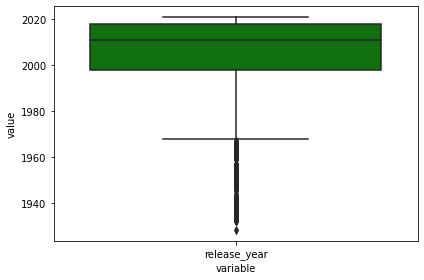

In [24]:
# OUTLIER
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Kolom numerik yang memiliki outlier adalah release_year.

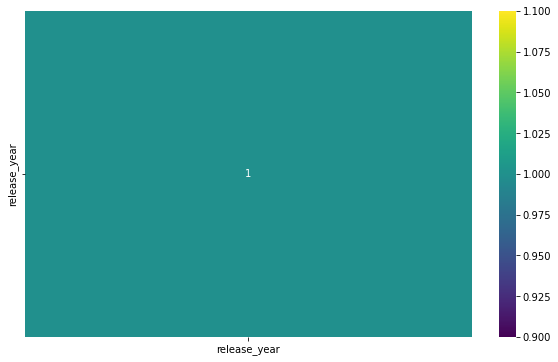

In [19]:
#
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [34]:
# FILTER DATASET, BAGIAN MOVIE
disney_movie = df[df['type'] == "Movie"]
disney_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,88 min,Documentary
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,93 min,"Comedy, Fantasy, Kids"
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,127 min,"Coming of Age, Drama, Romance"
6,s7,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,"September 17, 2021",2009,106 min,"Comedy, Romance, Romantic Comedy"
7,s8,Movie,Descendants: Royal Wedding,Salvador Simó,"Dove Cameron, Sofia Carson, Booboo Stewart, Mi...",NaN,"September 17, 2021",2021,22 min,"Animation, Fantasy, Musical"


In [36]:
# DIMENSI DATA MOVIE
disney_movie.shape

(991, 10)

(991, 10) artinya data Movie memiliki 991 baris dan 10 kolom.

In [32]:
# FILTER DATASET, BAGIAN TV SHOW
disney_tv = df[df['type'] == "TV Show"]
disney_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,2 Seasons,"Animals & Nature, Docuseries, Family"
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,1 Season,"Action-Adventure, Animation, Kids"
5,s6,TV Show,Star Wars: Visions,NaN,NaN,NaN,"September 22, 2021",2021,1 Season,"Action-Adventure, Animation, Anime"
13,s14,TV Show,Life Below Zero,NaN,"Chip Hailstone, Agnes Hailstone, Sue Aikens, A...",United States,"September 15, 2021",2012,16 Seasons,"Action-Adventure, Animals & Nature, Docuseries"
14,s15,TV Show,Miraculous: Tales Of Ladybug & Cat Noir,NaN,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan, United States","September 15, 2021",2015,1 Season,"Action-Adventure, Animation, Fantasy"


In [33]:
# DIMENSI DATA TV SHOW
disney_tv.shape

(377, 10)

(377, 10) artinya data TV Show memiliki 377 baris dan 10 kolom.

## Kesimpulan

Disney+ dalam beberapa tahun terakhir ini lebih fokus pada Film daripada Acara TV. Hal ini dibuktikan dengan jumlah baris pada data Movie lebih banyak daripada data TV Show.